,Nodes,Processes,Bytes,Time_sec,Bandwidth_MBs
0,1,2,1,3.262030e-07,2.9236
1,1,2,2,3.178820e-07,6.0002
2,1,2,4,3.067560e-07,12.4356
3,1,2,8,3.056395e-07,24.9621
4,1,2,16,3.040890e-07,50.1787


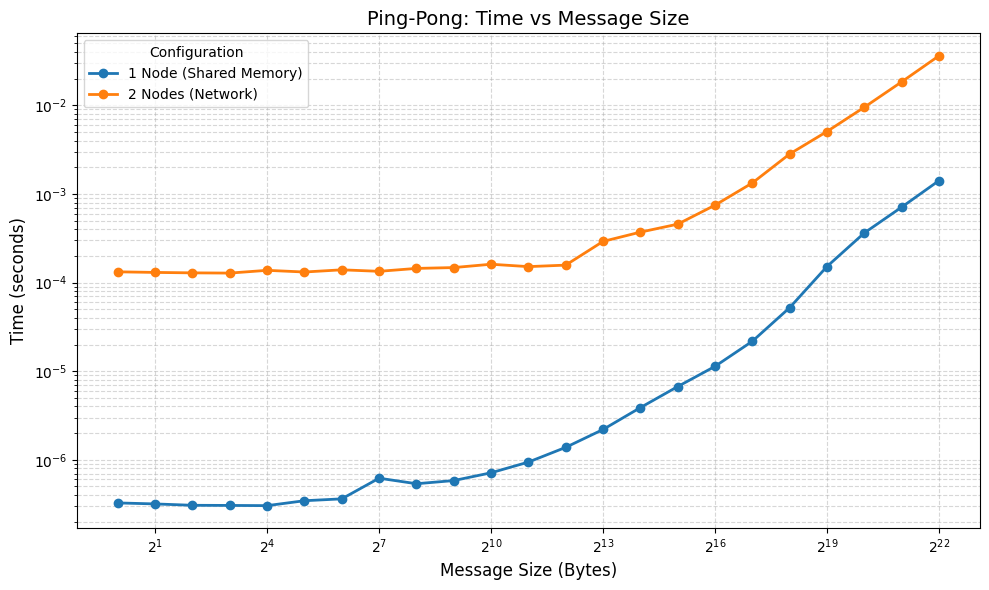

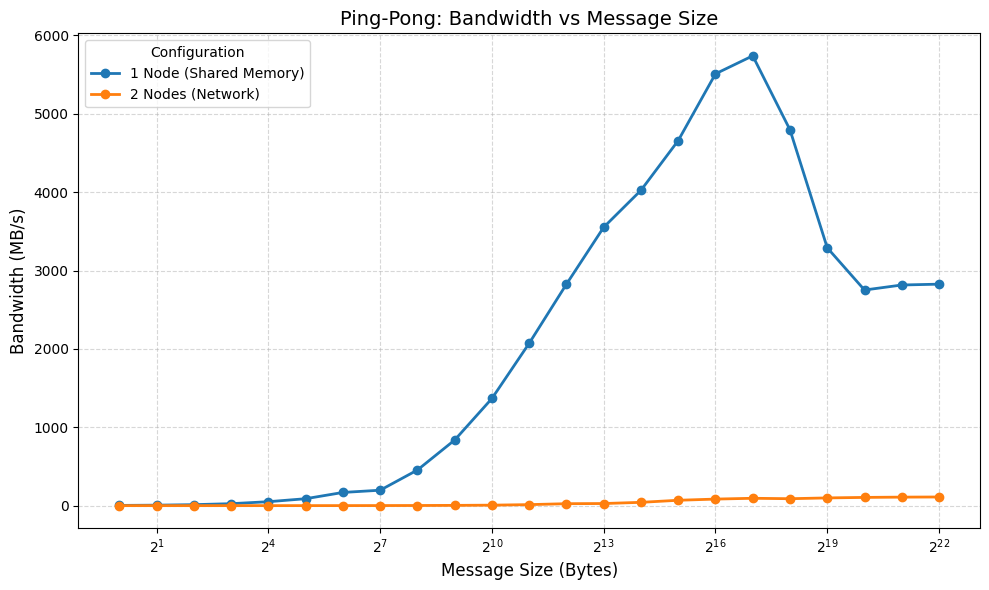

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('3_results.csv')
except FileNotFoundError:
    print("Ошибка: Файл '3_results.csv' не найден. Сначала запустите C++ программу.")
    exit()

plot_configs = [
    ('Time_sec', 'Time (seconds)', 'Ping-Pong: Time vs Message Size'),
    ('Bandwidth_MBs', 'Bandwidth (MB/s)', 'Ping-Pong: Bandwidth vs Message Size')
]

unique_nodes = sorted(df['Nodes'].unique())
display(df.head())

for col_name, ylabel, title in plot_configs:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for node_count in unique_nodes:
        subset = df[df['Nodes'] == node_count]
        
        if node_count == 1:
            label_text = f'{node_count} Node (Shared Memory)'
        else:
            label_text = f'{node_count} Nodes (Network)'
            
        ax.plot(subset['Bytes'], subset[col_name], 
                marker='o', linestyle='-', linewidth=2, 
                label=label_text)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Message Size (Bytes)', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    ax.set_xscale('log', base=2) 
    

    if col_name == 'Time_sec':
        ax.set_yscale('log')
    # if col_name == 'Bandwidth_MBs': ax.set_yscale('log') # Раскомментируйте, если нужно

    ax.grid(True, which="both", ls="--", alpha=0.5)
    ax.legend(title="Configuration")

    plt.tight_layout() 
    plt.show()